# Central Carbon Metabolism

- Molecule and Reaction curation work was done in `Glycolysis` and `TCA and OxPhos` notebooks. All we need to do here is build the pathways

In [1]:
from importlib.resources import files
import json
from mosmo.knowledge import kb
from mosmo.model import Molecule, Reaction, Pathway
from mosmo.preso.escher import escher_map

# Data files are resources in the `data` package.
import data
def datafile(filename):
    return files(data).joinpath(filename)

KB = kb.configure_kb()

## Use previously built pathways as a reference for desired reaction order

In [2]:
glycolysis_ppp_ov = KB('glycolysis_ppp_ov')
tca_cycle = KB('tca_cycle')
oxphos = KB('oxphos')
reactions = list(glycolysis_ppp_ov.reactions) + list(tca_cycle.reactions) + list(oxphos.reactions)

In [3]:
def build_pathway(pwid, reactions, name=None):
    # Filter by inclusion in the diagram, but maintain the original input order
    map_json = json.loads(datafile(f'{pwid}.json').read_text())
    rxn_ids = {rxn['bigg_id'] for rxn in map_json[1]['reactions'].values()}

    pw_reactions = []
    for kb_rxn in reactions:
        if kb_rxn.id in rxn_ids:
            pw_reactions.append(kb_rxn)
            rxn_ids.remove(kb_rxn.id)
    
    # In case we missed something refered to in the diagram
    if rxn_ids:
        print(f'Missed reactions: {rxn_ids}')

    return Pathway(
        id = pwid,
        name = name or pwid,
        reactions = pw_reactions,
        diagram = map_json,
    )

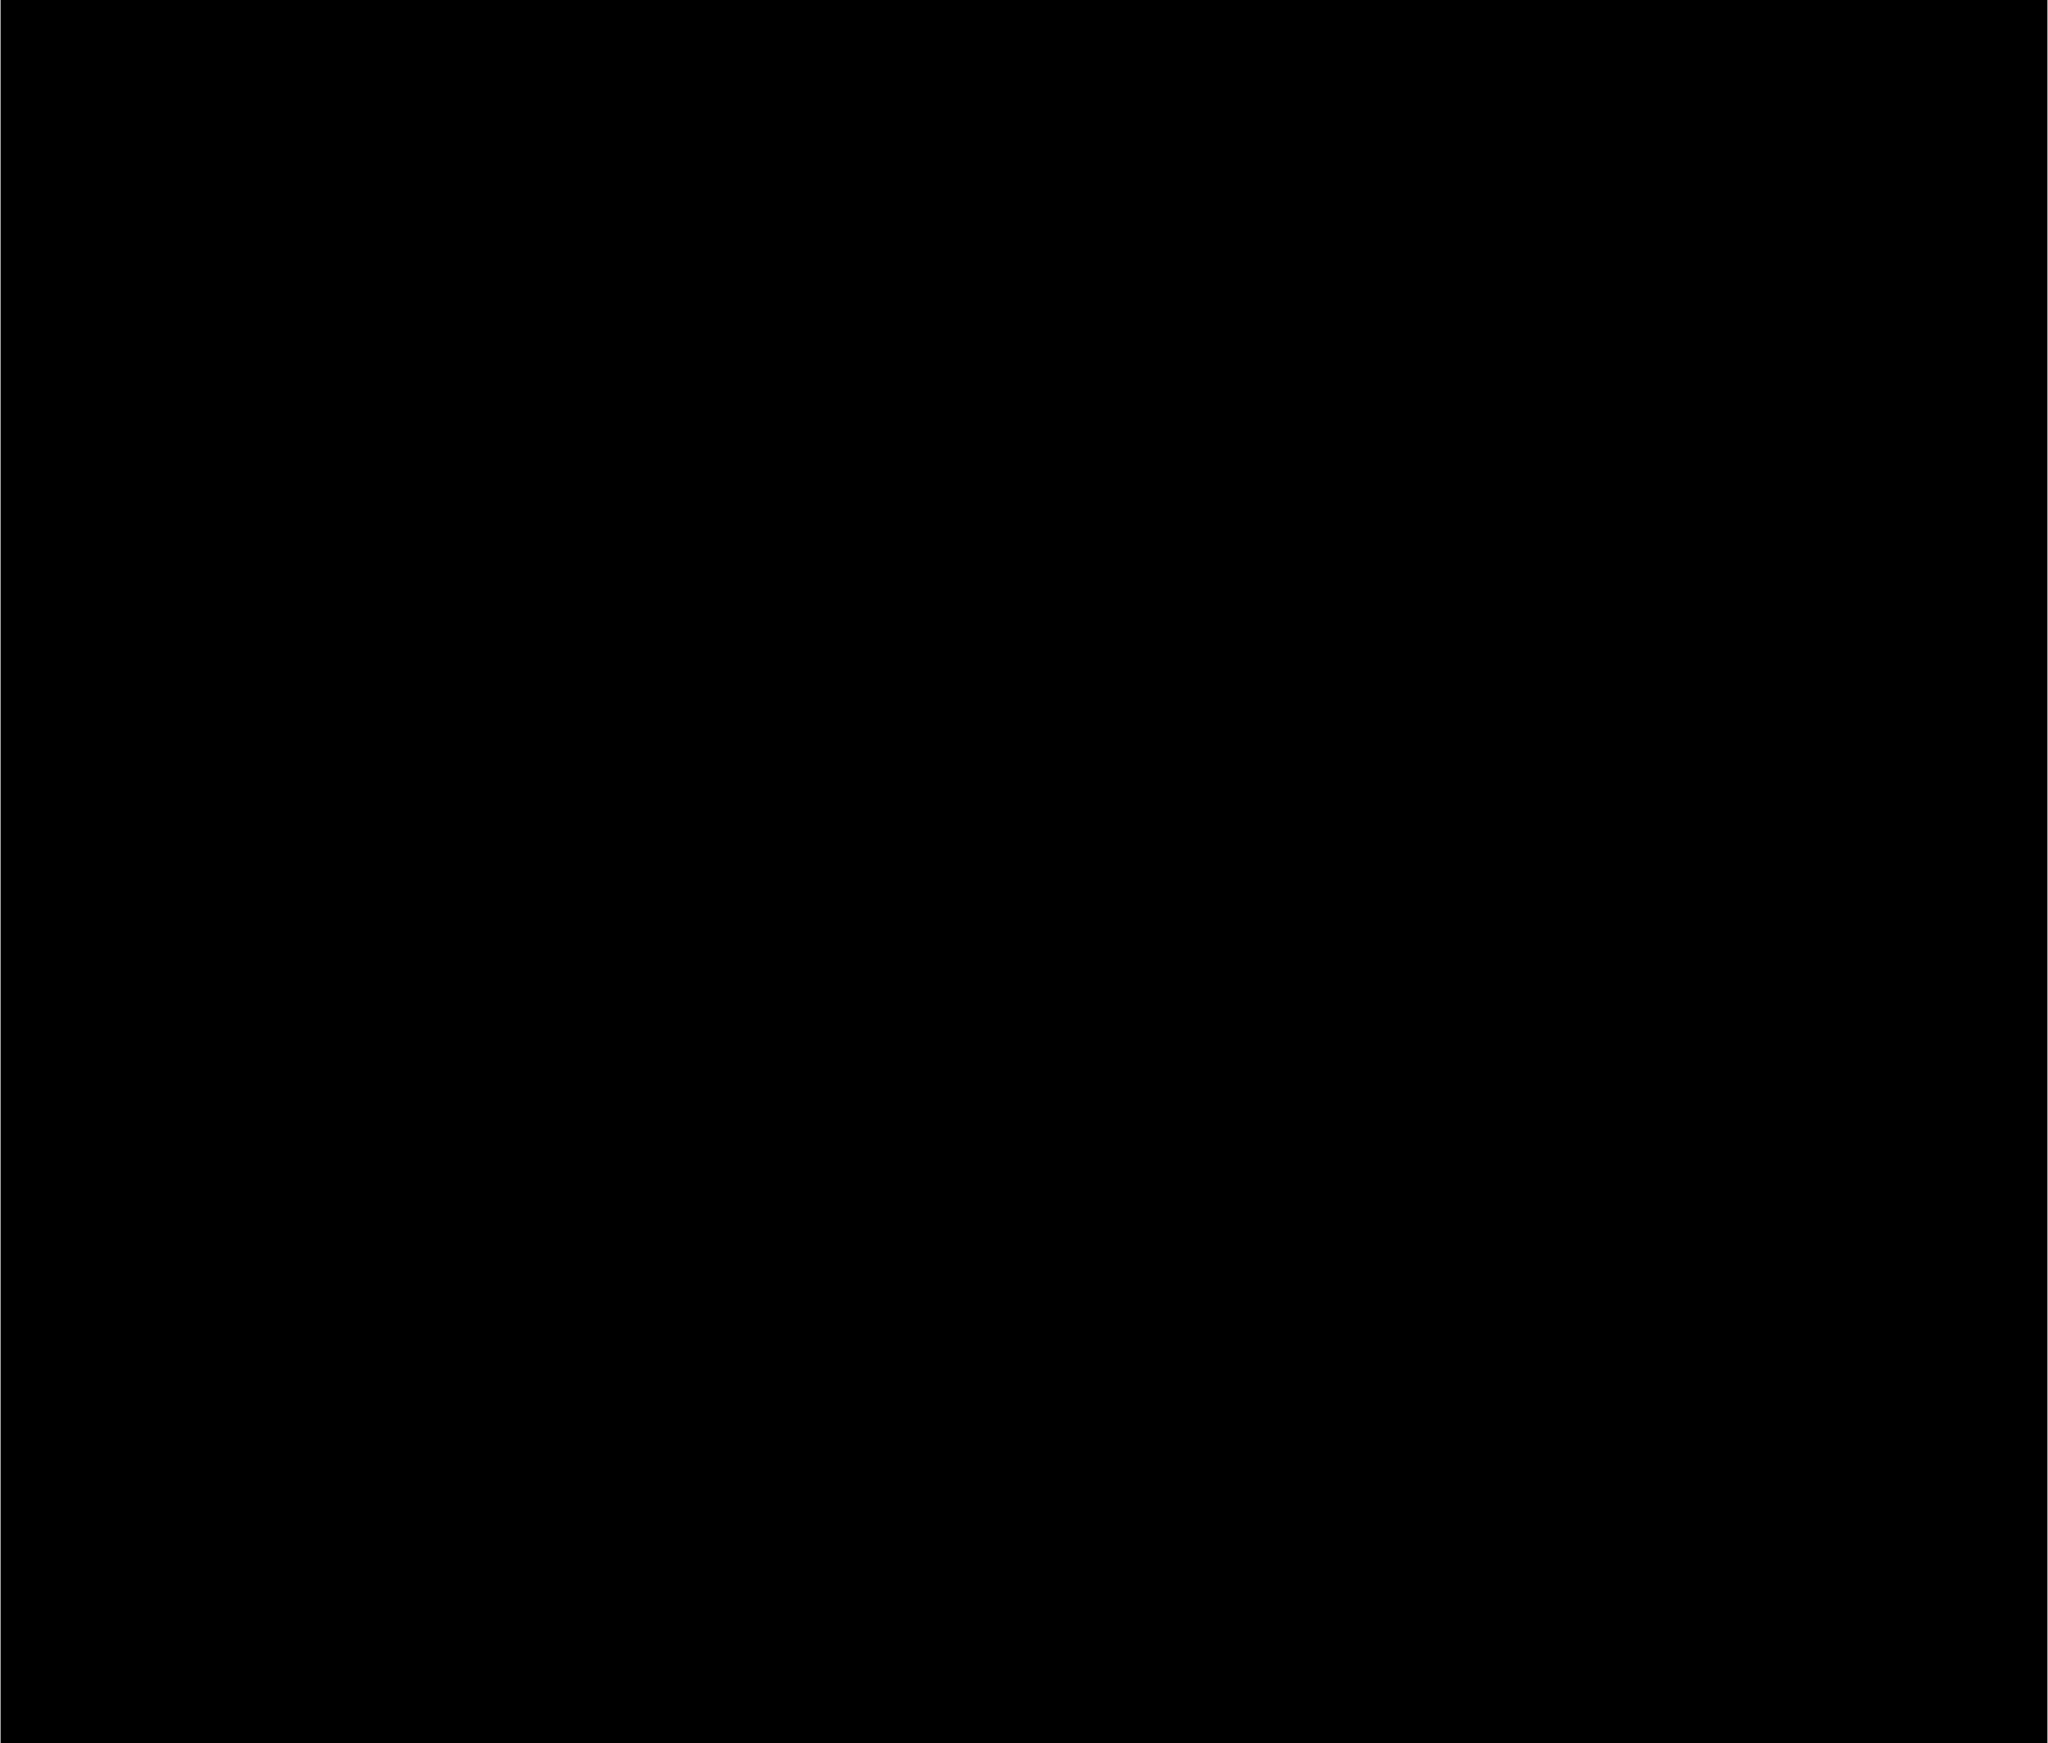

In [4]:
central_carbon = build_pathway(
    'central_carbon',
    reactions,
    'Central Carbon Metabolism')
escher_map.EscherMap(central_carbon.diagram).draw(width='20cm')

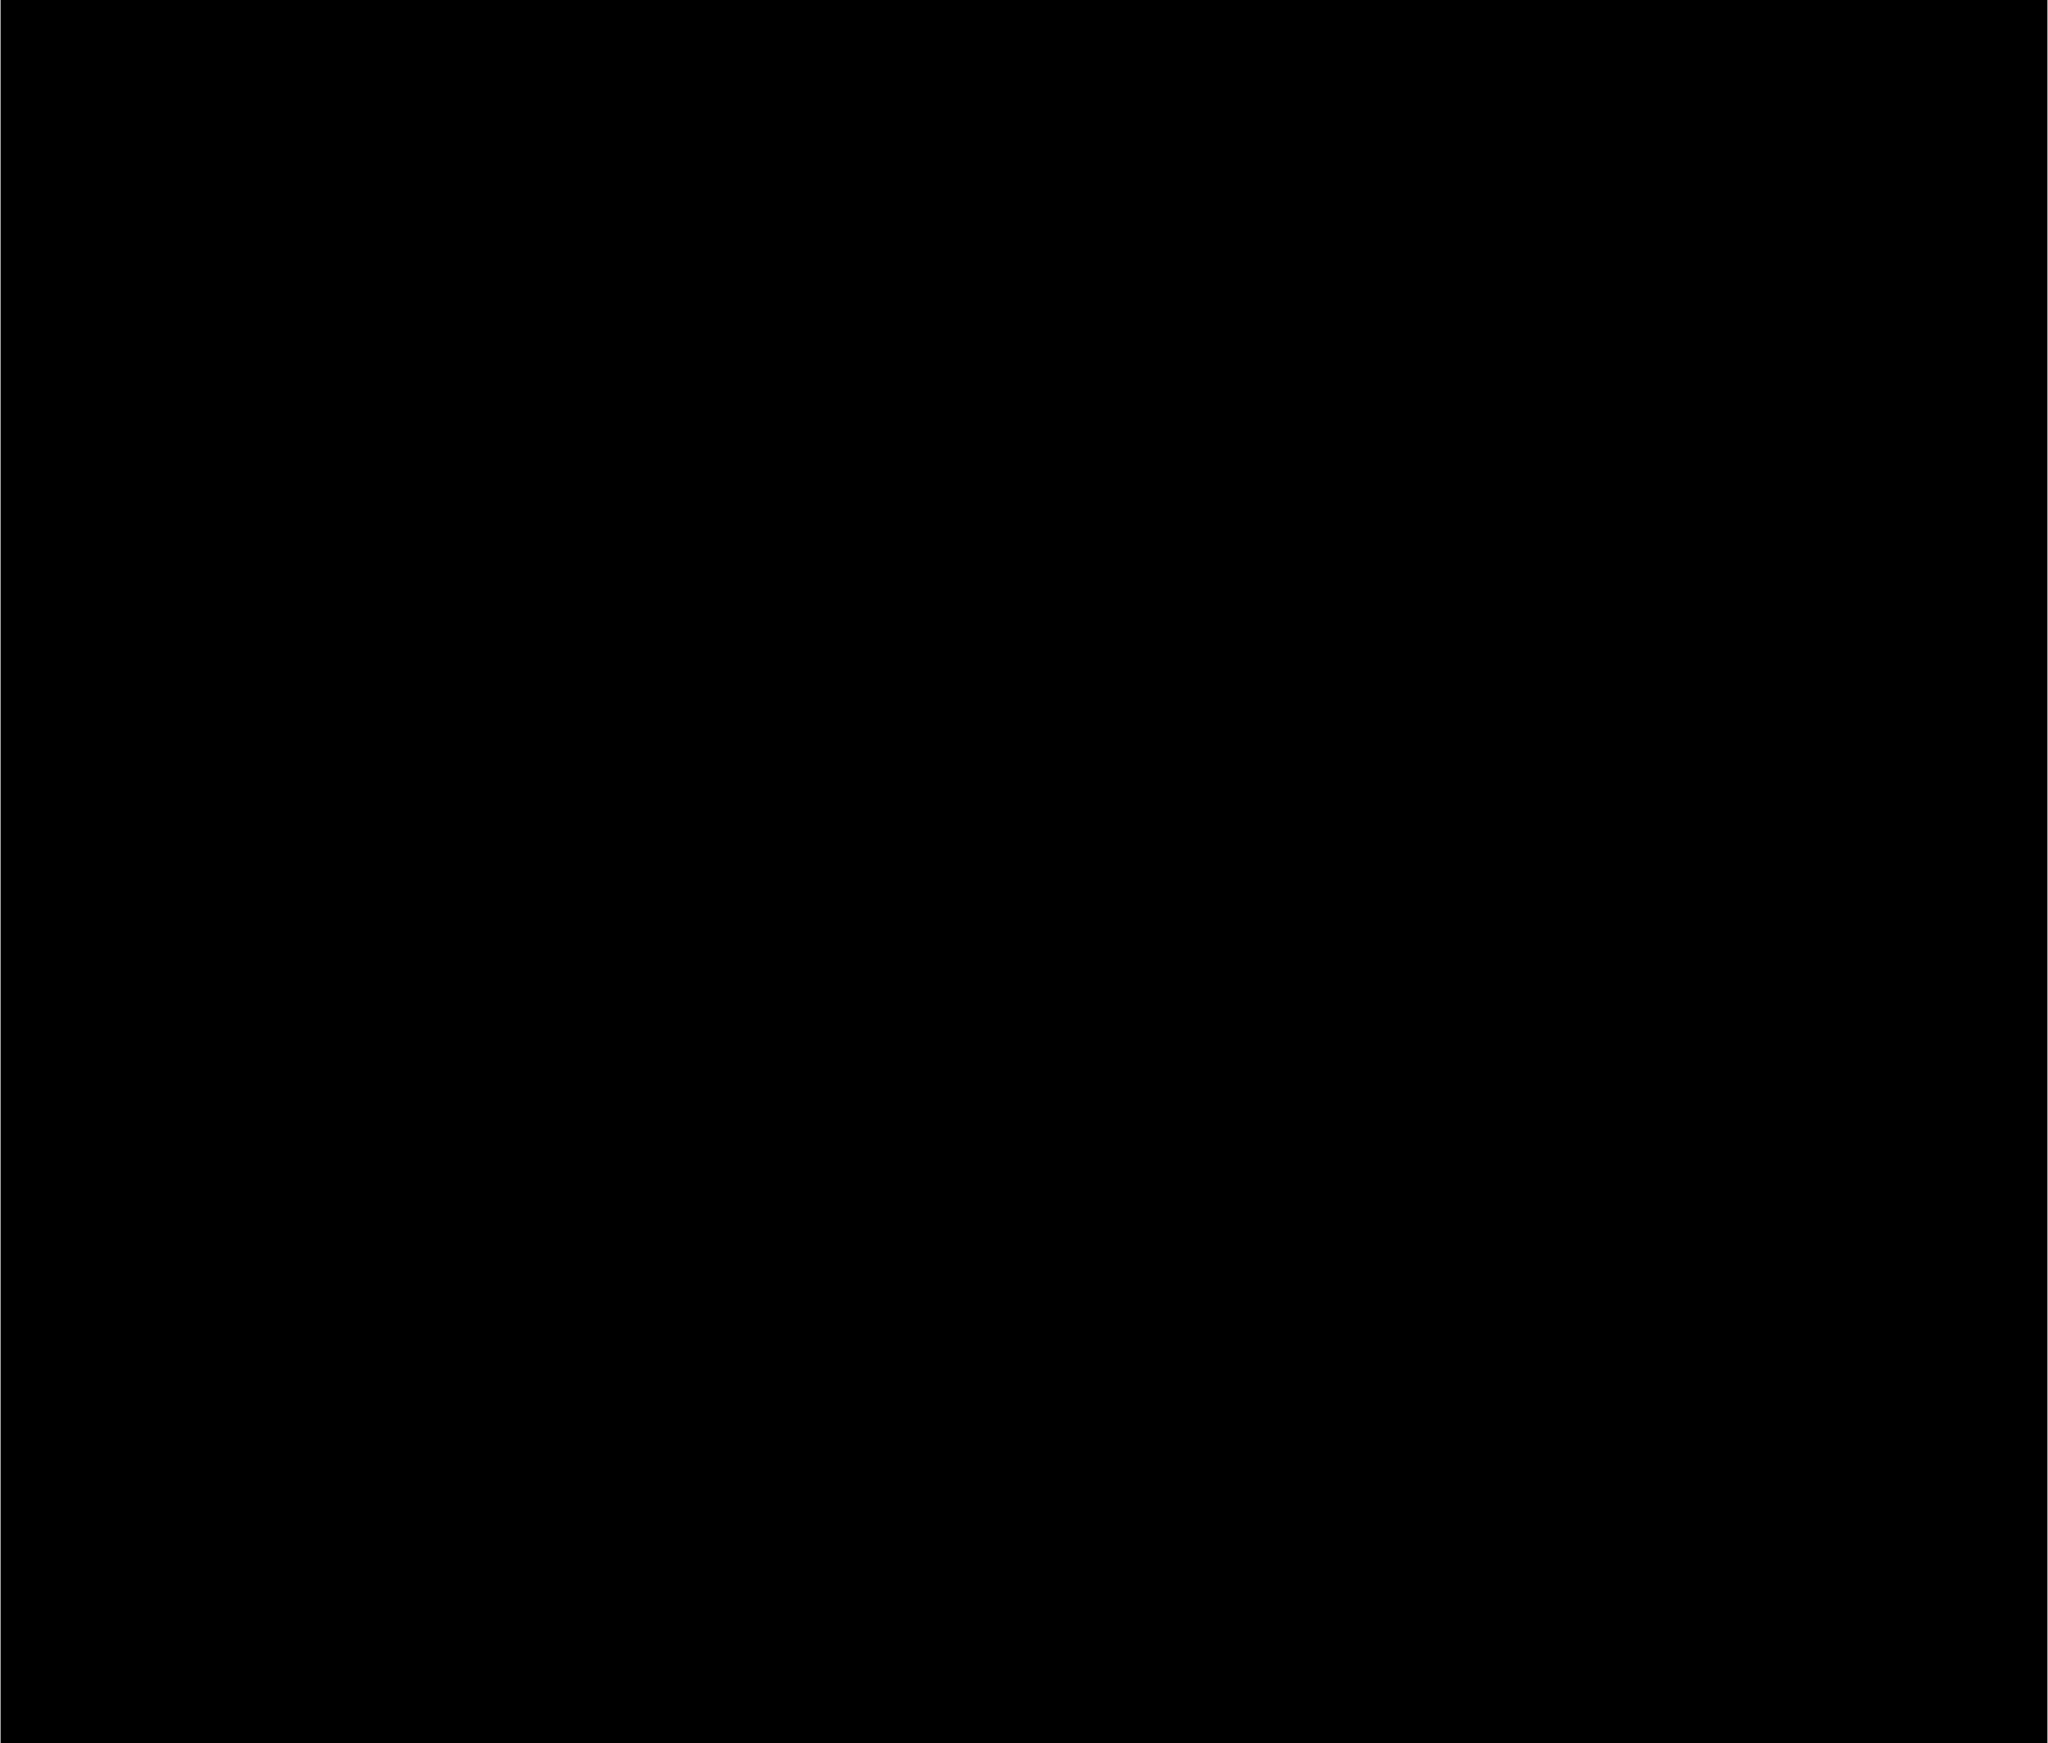

In [5]:
central_carbon_oxphos = build_pathway(
    'central_carbon_oxphos',
    reactions,
    'Central Carbon Metabolism + Oxidative Phosphorylation')
escher_map.EscherMap(central_carbon_oxphos.diagram).draw(width='24cm')

## Save the pathways

In [6]:
with KB.unlock(KB.pathways):
    KB.put(KB.pathways, central_carbon)
    KB.put(KB.pathways, central_carbon_oxphos)